In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
from gpflow.utilities import read_values, multiple_assign, set_trainable
from gpflow.inducing_variables import InducingPoints
import gpmaniflow
from gpmaniflow.models.SVGP import SVGP

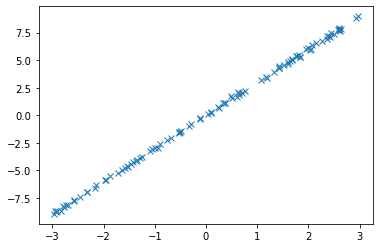

In [2]:
pX = np.linspace(-5.0, 5.0, 300)[:, None]
X = np.random.uniform(-3, 3, 100)[:, None]
Y = 3 * X + np.random.randn(*X.shape) * 0.1
Z = np.linspace(-5, 5, 50)[:, None]

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

plt.plot(X,Y ,"x")

In [3]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(2000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1577.3290979201543
Step: 50, Mini batch elbo: -637.5763281176946
Step: 100, Mini batch elbo: -232.22325414775455
Step: 150, Mini batch elbo: -171.66390758786932
Step: 200, Mini batch elbo: -155.45713503126615
Step: 250, Mini batch elbo: -150.86267147026015
Step: 300, Mini batch elbo: -148.22326212670197
Step: 350, Mini batch elbo: -145.82427071210202
Step: 400, Mini batch elbo: -143.84673260384182
Step: 450, Mini batch elbo: -141.0074038948355
Step: 500, Mini batch elbo: -138.38001723247362
Step: 550, Mini batch elbo: -135.6235300011445
Step: 600, Mini batch elbo: -132.761375545427
Step: 650, Mini batch elbo: -129.57704424400953
Step: 700, Mini batch elbo: -126.16040681263252
Step: 750, Mini batch elbo: -122.5507529076154
Step: 800, Mini batch elbo: -118.594367116489
Step: 850, Mini batch elbo: -114.28500678990665
Step: 900, Mini batch elbo: -109.78180187622974
Step: 950, Mini batch elbo: -104.58676839966037
Step: 1000, Mini batch elbo: -99.17593117576433
Ste

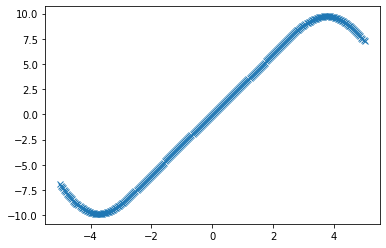

In [4]:
pmu, pvar = model.predict_f(pX)

plt.plot(pX, pmu, "x")

In [5]:
dmu, dvar = model.predict_df(pX)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'Z'